In [2]:
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#dpath = 'yale_subset_719'
rows = 192
cols = 168

img_files = glob.glob('yale_subset_719/*.bmp')
nimages = len(img_files)
imgs = np.zeros((rows * cols, nimages), dtype=np.uint8)

colseq = np.arange(nimages)
for i, picture in zip(colseq, img_files):
    imgs[:, i] = np.reshape(plt.imread(picture), (1, -1))

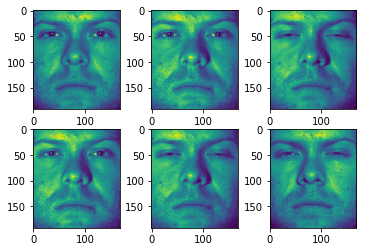

In [4]:
#plt.imshow(plt.imread(img_files[1]))
#plt.imshow(np.reshape(imgs[:,1], (rows,-1)))

fig, axes = plt.subplots(2, 3)
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(imgs[:, i+j], (rows, -1)))

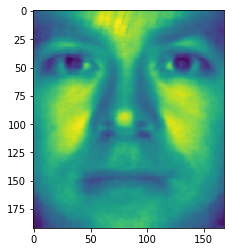

In [5]:
avg_face = np.sum(imgs, axis=1) / nimages
avg_face.astype(np.uint8)
plt.imshow(np.reshape(avg_face, (rows, -1)))

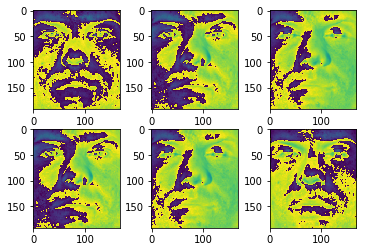

In [6]:
A = np.zeros((rows * cols, nimages), dtype=np.uint8)
for i in np.arange(nimages):
    A[:, i] = imgs[:, i] - avg_face
    
fig, axes = plt.subplots(2, 3)
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(A[:, i+j], (rows, -1)))

In [7]:
L = np.matmul(np.atleast_2d(A).T.astype(float), A.astype(float))
D, V = np.linalg.eig(L)
#D = np.sort(np.diag(D))

In [8]:
np.sort(np.diag(D))
#np.sort(np.diag(D)[::-1])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.86172217e+10],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.06380405e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.75882060e+09],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.02538735e+07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.76393057e+07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.17082251e+07]])

In [9]:
D

array([5.86172217e+10, 5.06380405e+09, 2.75882060e+09, 2.43522481e+09,
       1.53078774e+09, 1.31935814e+09, 1.04483141e+09, 7.87042310e+08,
       6.86374285e+08, 6.53485441e+08, 4.88365049e+08, 4.66403519e+08,
       4.53024901e+08, 4.09372940e+08, 3.78753498e+08, 3.74384547e+08,
       3.50068910e+08, 3.34271406e+08, 3.13556314e+08, 3.07122217e+08,
       2.91531214e+08, 2.85232358e+08, 2.75237510e+08, 2.53774735e+08,
       2.43867361e+08, 2.40098158e+08, 2.33012260e+08, 2.23152340e+08,
       2.19546052e+08, 2.11449465e+08, 2.09537357e+08, 1.97781971e+08,
       1.95975206e+08, 1.93547587e+08, 1.86769123e+08, 1.91264185e+08,
       1.82720228e+08, 1.76662607e+08, 1.69588185e+08, 1.67509856e+08,
       1.61035446e+08, 1.64435480e+08, 4.08342298e+07, 1.55840303e+08,
       1.52795204e+08, 4.53082397e+07, 1.52134965e+08, 4.69138942e+07,
       1.49993860e+08, 1.47685749e+08, 5.10108178e+07, 1.41780618e+08,
       1.40502762e+08, 1.37099222e+08, 5.54530985e+07, 5.75890930e+07,
      

In [11]:
A

array([[ 14,  38,  33, ...,  10,  36,  41],
       [ 12,  35,  32, ...,  12,  41,  46],
       [ 14,  34,  28, ...,  14,  43,  48],
       ...,
       [217, 213, 208, ..., 234, 216, 216],
       [216, 211, 208, ..., 233, 215, 214],
       [214, 210, 209, ..., 230, 215, 214]], dtype=uint8)